<a href="https://colab.research.google.com/github/muskanalirizvi/Algorithm-Performance-Benchmarking/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df['RiskLevel'] =  encode.fit_transform(df[['RiskLevel']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['RiskLevel'], axis = 1), df['RiskLevel'],random_state = 32, test_size = 0.2 )

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)

0.8472906403940886

In [63]:
risklevel = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)

    risklevel.append(accuracy_score(y_test, y_pred))

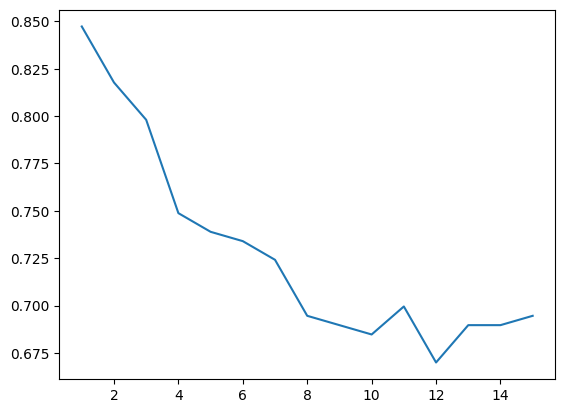

In [64]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),risklevel)